<a href="https://colab.research.google.com/github/chirag912/first-project/blob/main/CNN_CIFAR10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape  :", X_test.shape)
print("y_test shape  :", y_test.shape)

X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape  : (10000, 32, 32, 3)
y_test shape  : (10000, 1)


In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

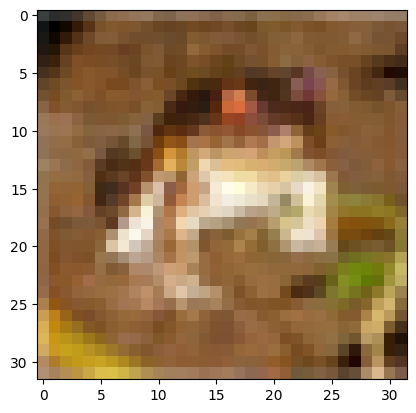

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3 )
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape  :", X_test.shape)
print("y_test shape  :", y_test.shape)

X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape  : (10000, 32, 32, 3)
y_test shape  : (10000, 1)


In [ ]:
X_train /= 216
X_test /= 216

In [ ]:
X_train[0]

array([[[0.27314815, 0.28703704, 0.29166666],
        [0.19907407, 0.21296297, 0.20833333],
        [0.23148148, 0.22222222, 0.19907407],
        ...,
        [0.7314815 , 0.6111111 , 0.5       ],
        [0.7037037 , 0.5787037 , 0.4722222 ],
        [0.6851852 , 0.5740741 , 0.47685185]],

       [[0.07407407, 0.09259259, 0.09259259],
        [0.        , 0.        , 0.        ],
        [0.08333334, 0.03703704, 0.        ],
        ...,
        [0.5694444 , 0.4074074 , 0.25462964],
        [0.5509259 , 0.38425925, 0.23148148],
        [0.5648148 , 0.4027778 , 0.2638889 ]],

       [[0.11574074, 0.11111111, 0.09722222],
        [0.07407407, 0.03240741, 0.        ],
        [0.22685185, 0.125     , 0.03703704],
        ...,
        [0.5462963 , 0.3888889 , 0.23148148],
        [0.5555556 , 0.3888889 , 0.23148148],
        [0.5046296 , 0.33796296, 0.19444445]],

       ...,

       [[0.962963  , 0.787037  , 0.44444445],
        [0.9305556 , 0.7083333 , 0.1574074 ],
        [0.9166667 , 0

In [ ]:
n_classes = 10
print("Shape before one-hot encoding : ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test  =  to_categorical(y_test, n_classes)
print("Shape after one-hot encoding  : ", Y_train.shape)

Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding  :  (50000, 10)


In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense (200, activation='relu'))
model.add(Dense(150, activation= 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary(line_length=50)

Model: "sequential"
__________________________________________________
 Layer (type)         Output Shape        Param # 
 conv2d (Conv2D)      (None, 30, 30, 25   700     
                      )                           
                                                  
 max_pooling2d (MaxP  (None, 30, 30, 25   0       
 ooling2D)            )                           
                                                  
 flatten (Flatten)    (None, 22500)       0       
                                                  
 dense (Dense)        (None, 250)         5625250 
                                                  
 dense_1 (Dense)      (None, 200)         50200   
                                                  
 dense_2 (Dense)      (None, 150)         30150   
                                                  
 dense_3 (Dense)      (None, 100)         15100   
                                                  
 dense_4 (Dense)      (None, 50)          5050    
           

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X_train, Y_train, batch_size=110,epochs=20)

Epoch 1/20
455/455 [==============================] - 78s 172ms/step - loss: 1.3403 - accuracy: 0.5198
Epoch 2/20
455/455 [==============================] - 82s 181ms/step - loss: 1.1448 - accuracy: 0.5942
Epoch 3/20
455/455 [==============================] - 84s 184ms/step - loss: 0.9983 - accuracy: 0.6483
Epoch 4/20
455/455 [==============================] - 80s 176ms/step - loss: 0.8627 - accuracy: 0.6994
Epoch 5/20
455/455 [==============================] - 78s 173ms/step - loss: 0.7307 - accuracy: 0.7458
Epoch 6/20
455/455 [==============================] - 80s 176ms/step - loss: 0.6077 - accuracy: 0.7909
Epoch 7/20
455/455 [==============================] - 81s 178ms/step - loss: 0.4948 - accuracy: 0.8305
Epoch 8/20
455/455 [==============================] - 80s 176ms/step - loss: 0.4030 - accuracy: 0.8622
Epoch 9/20
455/455 [==============================] - 80s 177ms/step - loss: 0.3383 - accuracy: 0.8857
Epoch 10/20
455/455 [==============================] - 80s 176ms/step - l

In [ ]:
 test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 18ms/step - loss: 2.6953 - accuracy: 0.5892


In [ ]:
print('Model Accuracy :', test_acc)
print('Model Loss     :', test_loss)

Model Accuracy : 0.5892000198364258
Model Loss     : 2.695317268371582


In [ ]:
X_test[0]

array([[[0.7314815 , 0.5185185 , 0.22685185],
        [0.7361111 , 0.5138889 , 0.2175926 ],
        [0.7638889 , 0.537037  , 0.2361111 ],
        ...,
        [0.6342593 , 0.4398148 , 0.16666667],
        [0.5833333 , 0.4212963 , 0.16666667],
        [0.537037  , 0.3935185 , 0.15277778]],

       [[0.7037037 , 0.5185185 , 0.2361111 ],
        [0.6990741 , 0.5092593 , 0.18518518],
        [0.7361111 , 0.5277778 , 0.20833333],
        ...,
        [0.6296296 , 0.4398148 , 0.14351852],
        [0.5787037 , 0.4212963 , 0.14814815],
        [0.5509259 , 0.4074074 , 0.1574074 ]],

       [[0.6990741 , 0.5092593 , 0.2175926 ],
        [0.6990741 , 0.5046296 , 0.15277778],
        [0.7314815 , 0.5138889 , 0.16666667],
        ...,
        [0.6435185 , 0.4537037 , 0.1574074 ],
        [0.6018519 , 0.4398148 , 0.1574074 ],
        [0.5555556 , 0.41203704, 0.15277778]],

       ...,

       [[0.3148148 , 0.5740741 , 0.8194444 ],
        [0.19444445, 0.46296296, 0.6851852 ],
        [0.14351852, 0

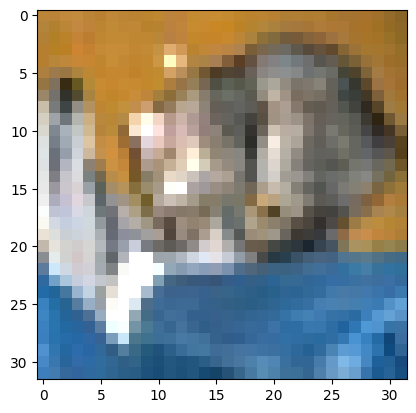

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
X_test[0].shape

(32, 32, 3)

In [ ]:
model.predict(X_test[0].reshape(1,32,32,3))

1/1 [==============================] - 0s 372ms/step


array([[1.8637327e-06, 5.7780642e-07, 1.8960624e-07, 9.9034709e-01,
        5.5413490e-10, 9.5734810e-03, 7.6705044e-07, 9.1040732e-08,
        6.9024245e-05, 6.9016901e-06]], dtype=float32)

In [ ]:
np.argmax(model.predict(X_test[0].reshape(1, 32,32, 3)))

1/1 [==============================] - 0s 98ms/step


3